In [49]:
import pandas as pd
import os
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

##### Merge all 12 months data into one single csv file

In [39]:
files=[file for file in os.listdir("./Sales_data")] #files in Sales_data folder
all_months_data=pd.DataFrame() #creates df for all_months_data
for file in files:
    df=pd.read_csv("./Sales_Data/"+file) #reads all csv files
    all_months_data=pd.concat([all_months_data, df]) #adds all files in all_months_data

all_months_data.to_csv("all_data.csv", index=False) #creates csv for all_months_data

In [40]:
all_data=pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [41]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

### Cleaning up the data

##### drop rows of NaN

In [42]:
all_data[all_data.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
data=all_data.dropna(how='all')
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [44]:
data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [45]:
#'Or' in month data, need to remove it
# find Or
temp_data=data[data["Order Date"].str[0:2]=='Or']
temp_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [46]:
newdata=data[data["Order Date"].str[0:2]!='Or']
newdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### convert columns to correct dtypes

In [50]:
newdata["Quantity Ordered"]=pd.to_numeric(newdata["Quantity Ordered"])
newdata["Price Each"]=pd.to_numeric(newdata["Price Each"])

##### Add Month Column

In [51]:
newdata["Month"]=newdata['Order Date'].str[0:2]
newdata["Month"]=newdata["Month"].astype("int32")
newdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


##### Add Sales Column

In [52]:
newdata["Sales"] = newdata["Quantity Ordered"] * newdata["Price Each"]
newdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Questions

#### Q1) What was the best month for sales? How much was earned that month?

In [53]:
sales_result = newdata[["Month", "Quantity Ordered", "Price Each", "Sales"]].groupby("Month").sum()#.sort_values(by=["Sales"], ascending=False)
sales_result

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


##### Best month for sales was December with $4613443.34 sales

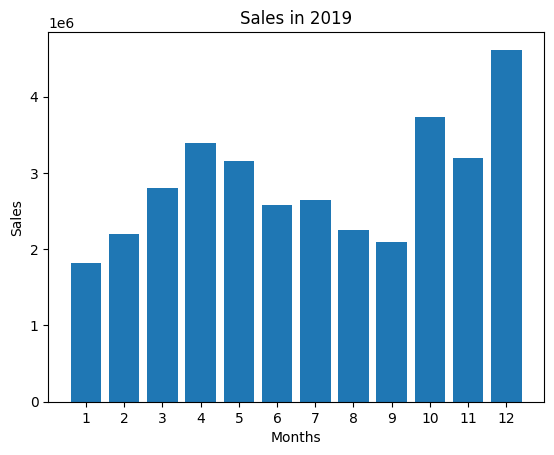

In [54]:
#plotting 2019 sales
months = range(1 ,13)
plt.bar(months, sales_result["Sales"])
plt.xticks(months)
plt.ylabel("Sales")
plt.xlabel("Months")
plt.title("Sales in 2019")
plt.show()

#### Q2) What city had the highest number of sales? How much was earned from that city?

##### adding city column

In [55]:
def get_city(address):
    return address.split(",")[1] #gets city
def get_state(address):
    return address.split(",")[2].split(" ")[1] #0 is whitespace because of the space bw (, T)


newdata["City"]=newdata["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
newdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [56]:
#finding city sales
city_results=newdata[["Sales", "City"]].groupby("City").sum()#.sort_values(by=["Sales"], ascending=False)
city_results

,Sales
City,
Atlanta (GA),2795498.58
Austin (TX),1819581.75
Boston (MA),3661642.01
Dallas (TX),2767975.40
Los Angeles (CA),5452570.80
New York City (NY),4664317.43
Portland (ME),449758.27
Portland (OR),1870732.34
San Francisco (CA),8262203.91


##### City with highest number of sales is San Francisco with $8262203.91 sales

Text(0.5, 1.0, 'Sales in Cities')

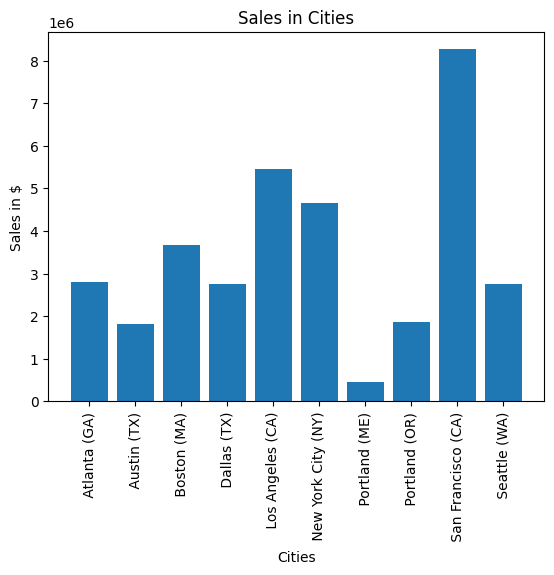

In [57]:
city= [city for city, df in newdata.groupby('City')]
plt.bar(city, city_results['Sales'])
plt.xticks(city, rotation='vertical', size=10)
plt.xlabel("Cities")
plt.ylabel("Sales in $")
plt.title("Sales in Cities")

#### Q3) What time should we display advertisements to maximize likelihood of customer's buying product?

In [58]:
newdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [62]:
#need to get time, so convert it to datetime
newdata["Order Date"]=pd.to_datetime(newdata['Order Date'], format='%Y-%M-%D %H:%M:%S') #using format for date non consistent warning
newdata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [64]:
newdata["Hour"]=newdata["Order Date"].dt.hour
newdata

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17


In [83]:
newdata.groupby(["Hour"]).count().sort_values(by=['Quantity Ordered'], ascending=False)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
Hour,,,,,,,,,
19,12905,12905,12905,12905,12905,12905,12905,12905,12905
12,12587,12587,12587,12587,12587,12587,12587,12587,12587
11,12411,12411,12411,12411,12411,12411,12411,12411,12411
18,12280,12280,12280,12280,12280,12280,12280,12280,12280
20,12228,12228,12228,12228,12228,12228,12228,12228,12228
13,12129,12129,12129,12129,12129,12129,12129,12129,12129
14,10984,10984,10984,10984,10984,10984,10984,10984,10984
10,10944,10944,10944,10944,10944,10944,10944,10944,10944
21,10921,10921,10921,10921,10921,10921,10921,10921,10921


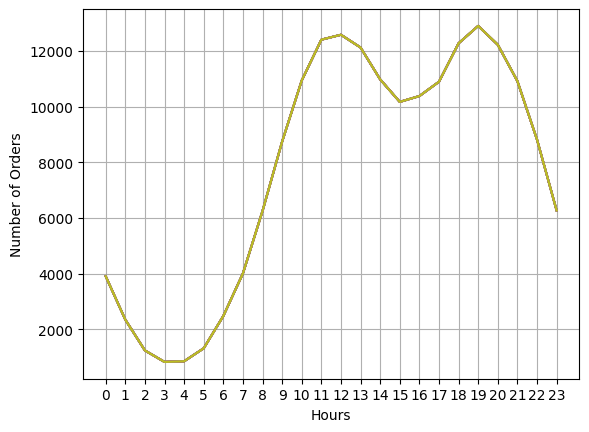

In [86]:
hours = [hour for hour, df in newdata.groupby('Hour')]
plt.plot(hours, newdata.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

##### The maximum likelihood of customer buying products is around 7pm followed by 12pm

#### Q4) What products are more often sold together?

In [88]:
newdata

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17


In [112]:
#same order id for multiple sales
orderdata=newdata[newdata['Order ID'].duplicated(keep=False)]
orderdata

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11
...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta (GA),20
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta (GA),0
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta (GA),0
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco (CA),13


In [114]:
#creating column grouped product where data is grouped by order id and product is taken
orderdata["Grouped Products"]=orderdata.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))
#removing repetition
orderdata=orderdata[['Order ID', 'Grouped Products']].drop_duplicates()
orderdata

,Order ID,Grouped Products
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones, Apple Airpods Headph..."
186783,259297,"iPhone, Lightning Charging Cable, Lightning Ch..."
186791,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)"
186803,259314,"Wired Headphones, AAA Batteries (4-pack)"


In [126]:
#count the pairs that occur frequently
from itertools import combinations
from collections import Counter

count = Counter()

for row in orderdata['Grouped Products']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for products, value in count.most_common(10):
    print(products,value)

('iPhone', ' Lightning Charging Cable') 1005
('Google Phone', ' USB-C Charging Cable') 987
('iPhone', ' Wired Headphones') 447
('Google Phone', ' Wired Headphones') 414
('Vareebadd Phone', ' USB-C Charging Cable') 361
('iPhone', ' Apple Airpods Headphones') 360
('Google Phone', ' Bose SoundSport Headphones') 220
('Vareebadd Phone', ' Wired Headphones') 143
(' USB-C Charging Cable', ' Wired Headphones') 120
('Vareebadd Phone', ' Bose SoundSport Headphones') 80


##### "iPhone" and "Lightning Charging Cable" are often sold together with a total of 1005 times

#### Q5) What product sold the most?

In [142]:
#sum quantity order by grouping product
group_product = newdata[["Product", "Quantity Ordered"]].groupby("Product")
group_product.sum()#.sort_values(by=["Quantity Ordered"], ascending=False)

,Quantity Ordered
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635
AAA Batteries (4-pack),31017
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
Flatscreen TV,4819


##### "AAA Batteries (4-pack)" sold the most

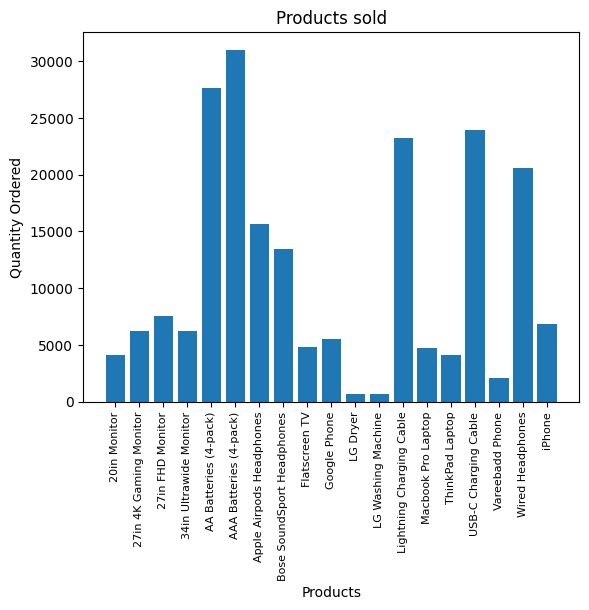

In [153]:
group_quantity = group_product.sum()['Quantity Ordered']
products = [product for product, df in group_product]
plt.bar(products, group_quantity)
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel("Products")
plt.ylabel("Quantity Ordered")
plt.title("Products sold")
plt.show()